In [1]:
!python -V

Python 3.8.3


In [4]:
import pandas as pd #import library to read data into dataframe


In [5]:
recipes = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DS0103EN/labs/data/recipes.csv")
print("data read into dataframe!")

data read into dataframe!


In [6]:
recipes.head()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


In [7]:
recipes.shape

(57691, 384)

In [13]:
import re
ingredients = list(recipes.columns.values)
print([match.group(0) for ingredient in ingredients for match in[(re.compile(".*(rice).*")).search(ingredient)] if match])


['brown_rice', 'licorice', 'rice']


In [14]:
recipes["country"].value_counts()

American        40150
Mexico           1754
Italian          1715
Italy            1461
Asian            1176
                ...  
Indonesia          12
Belgium            11
East-African       11
Israel              9
Bangladesh          4
Name: country, Length: 69, dtype: int64

In [15]:
column_names = recipes.columns.values
column_names[0] = "cuisine"
recipes.columns = column_names

recipes

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57686,Japan,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57687,Japan,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57688,Japan,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57689,Japan,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


In [16]:
recipes["cuisine"] = recipes["cuisine"].str.lower()

In [18]:
import numpy as np
recipes.loc[recipes["cuisine"] == "austria", "cuisine"] = "austrian"
recipes.loc[recipes["cuisine"] == "belgium", "cuisine"] = "belgian"
recipes.loc[recipes["cuisine"] == "china", "cuisine"] = "chinese"
recipes.loc[recipes["cuisine"] == "canada", "cuisine"] = "canadian"
recipes.loc[recipes["cuisine"] == "netherlands", "cuisine"] = "dutch"
recipes.loc[recipes["cuisine"] == "france", "cuisine"] = "french"
recipes.loc[recipes["cuisine"] == "germany", "cuisine"] = "german"
recipes.loc[recipes["cuisine"] == "india", "cuisine"] = "indian"
recipes.loc[recipes["cuisine"] == "indonesia", "cuisine"] = "indonesian"
recipes.loc[recipes["cuisine"] == "iran", "cuisine"] = "iranian"
recipes.loc[recipes["cuisine"] == "italy", "cuisine"] = "italian"
recipes.loc[recipes["cuisine"] == "japan", "cuisine"] = "japanese"
recipes.loc[recipes["cuisine"] == "israel", "cuisine"] = "israeli"
recipes.loc[recipes["cuisine"] == "korea", "cuisine"] = "korean"
recipes.loc[recipes["cuisine"] == "lebanon", "cuisine"] = "lebanese"
recipes.loc[recipes["cuisine"] == "malaysia", "cuisine"] = "malaysian"
recipes.loc[recipes["cuisine"] == "mexico", "cuisine"] = "mexican"
recipes.loc[recipes["cuisine"] == "pakistan", "cuisine"] = "pakistani"
recipes.loc[recipes["cuisine"] == "philippines", "cuisine"] = "philippine"
recipes.loc[recipes["cuisine"] == "scandinavia", "cuisine"] = "scandinavian"
recipes.loc[recipes["cuisine"] == "spain", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "portugal", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "switzerland", "cuisine"] = "swiss"
recipes.loc[recipes["cuisine"] == "thailand", "cuisine"] = "thai"
recipes.loc[recipes["cuisine"] == "turkey", "cuisine"] = "turkish"
recipes.loc[recipes["cuisine"] == "vietnam", "cuisine"] = "vietnamese"
recipes.loc[recipes["cuisine"] == "uk-and-ireland", "cuisine"] = "uk-and-irish"
recipes.loc[recipes["cuisine"] == "irish", "cuisine"] = "uk-and-irish"

# remove data for cuisines with < 50 recipes:
recipes_counts = recipes["cuisine"].value_counts()
cuisines_indices = recipes_counts > 50

cuisines_to_keep = list(np.array(recipes_counts.index.values)[np.array(cuisines_indices)])
recipes = recipes.loc[recipes["cuisine"].isin(cuisines_to_keep)]

# convert all Yes's to 1's and the No's to 0's
recipes = recipes.replace(to_replace="Yes", value=1)
recipes = recipes.replace(to_replace="No", value=0)

In [21]:
 #import decision trees scikit-learn libraries
%matplotlib inline
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt

!conda install python-graphviz --yes
import graphviz

from sklearn.tree import export_graphviz

import itertools

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done


In [22]:
recipes.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# select subset of cuisines
asian_indian_recipes = recipes[recipes.cuisine.isin(["korean", "japanese", "chinese", "thai", "indian"])]
cuisines = asian_indian_recipes["cuisine"]
ingredients = asian_indian_recipes.iloc[:,1:]

bam_tree = tree.DecisionTreeClassifier(max_depth=3)
bam_tree.fit(ingredients, cuisines)

print("Decision tree model saved to bam_tree!")

Decision tree model saved to bam_tree!


In [35]:
!pip install graphviz

In [36]:
import graphviz
export_graphviz(bam_tree,
                feature_names=list(ingredients.columns.values),
                out_file="bam_tree.dot",
                class_names=np.unique(cuisines),
                filled=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel=False)

with open("bam_tree.dot") as bam_tree_image:
    bam_tree_graph = bam_tree_image.read()
graphviz.Source(bam_tree_graph)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [37]:
bamboo = recipes[recipes.cuisine.isin(["korean", "japanese", "chinese", "thai", "indian"])]

In [38]:
bamboo["cuisine"].value_counts()

korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: cuisine, dtype: int64

In [39]:
sample_n=30

In [41]:
import random
# take 30 recipes from each cuisine
random.seed(1234) # set random seed
bamboo_test = bamboo.groupby("cuisine", group_keys=False).apply(lambda x: x.sample(sample_n))

bamboo_test_ingredients = bamboo_test.iloc[:,1:] # ingredients
bamboo_test_cuisines = bamboo_test["cuisine"] # corresponding cuisines or labels

In [42]:
# check that we have 30 recipes from each cuisine
bamboo_test["cuisine"].value_counts()

chinese     30
indian      30
korean      30
japanese    30
thai        30
Name: cuisine, dtype: int64

In [43]:
bamboo_test_index = bamboo.index.isin(bamboo_test.index)
bamboo_train = bamboo[~bamboo_test_index]

bamboo_train_ingredients = bamboo_train.iloc[:,1:] # ingredients
bamboo_train_cuisines = bamboo_train["cuisine"] # corresponding cuisines or labels

In [44]:
bamboo_train["cuisine"].value_counts()

korean      769
indian      568
chinese     412
japanese    290
thai        259
Name: cuisine, dtype: int64

In [45]:
bamboo_train_tree = tree.DecisionTreeClassifier(max_depth=15)
bamboo_train_tree.fit(bamboo_train_ingredients, bamboo_train_cuisines)

print("Decision tree model saved to bamboo_train_tree!")

Decision tree model saved to bamboo_train_tree!


In [46]:
export_graphviz(bamboo_train_tree,
                feature_names=list(bamboo_train_ingredients.columns.values),
                out_file="bamboo_train_tree.dot",
                class_names=np.unique(bamboo_train_cuisines),
                filled=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel=False)

with open("bamboo_train_tree.dot") as bamboo_train_tree_image:
    bamboo_train_tree_graph = bamboo_train_tree_image.read()
graphviz.Source(bamboo_train_tree_graph)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [47]:
bamboo_pred_cuisines = bamboo_train_tree.predict(bamboo_test_ingredients)

C:\Users\wajee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=['chinese' 'indian' 'japanese' 'korean' 'thai'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


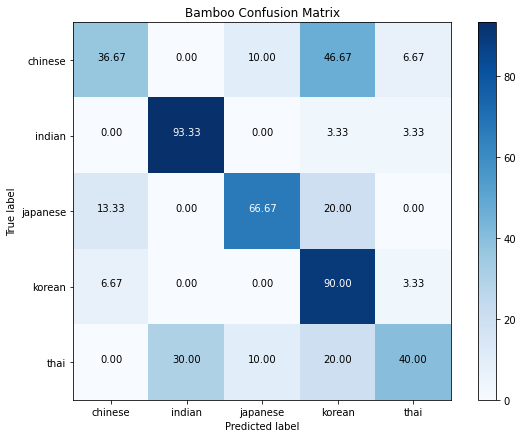

In [48]:
test_cuisines = np.unique(bamboo_test_cuisines)
bamboo_confusion_matrix = confusion_matrix(bamboo_test_cuisines, bamboo_pred_cuisines, test_cuisines)
title = 'Bamboo Confusion Matrix'
cmap = plt.cm.Blues

plt.figure(figsize=(8, 6))
bamboo_confusion_matrix = (
    bamboo_confusion_matrix.astype('float') / bamboo_confusion_matrix.sum(axis=1)[:, np.newaxis]
    ) * 100

plt.imshow(bamboo_confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(test_cuisines))
plt.xticks(tick_marks, test_cuisines)
plt.yticks(tick_marks, test_cuisines)

fmt = '.2f'
thresh = bamboo_confusion_matrix.max() / 2.
for i, j in itertools.product(range(bamboo_confusion_matrix.shape[0]), range(bamboo_confusion_matrix.shape[1])):
    plt.text(j, i, format(bamboo_confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if bamboo_confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()